<a href="https://colab.research.google.com/github/christiano-farias/Analise-de-Credito---Redes-Neurais/blob/main/Cr%C3%A9dito_Banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPORTE À TOMADA DE DECISÃO NA CONCESSÃO DE CRÉDITO DE UM BANCO ALEMÃO: MODELOS DE CLASSIFICAÇÃO DE MACHINE LEARNING POR MEIO DE REDES NEURAIS ARTIFICIAIS**

# **1 Análise do Problema**

 
**PROBLEMA**:
Se o valor de empréstimo for concedido ao solicitante, ele provavelmente pagará ou se tornará inadimplente?

De outro modo, quando um banco recebe um pedido de empréstimo pessoal, com base no perfil do solicitante, o executivo do banco deve tomar uma decisão sobre prosseguir ou não com a aprovação do empréstimo. 
Dois tipos de riscos estão associados à decisão do banco:

*   Se o requerente é tem perfil do tipo **"bom"** ele apresenta baixo risco de crédito, ou seja, é provável que honre o compromisso assumido e consequentemente não conceder o referido crédito para a pessoa resulta em perda de negócios para o banco;
*   Por outro lado, se o requerente pode ser do tipo "ruim", tendo  alto risco de crédito, ou seja, não é provável que pague o empréstimo, e a aprovação resultaria em uma perda financeira para o banco



 
**OBJETIVO**:
Fornecer ferramentas que possam auxiliar à tomada de decisão de concessão de crédito pelo banco alemão baseado em perfis demográficos e socioeconômicos dos requerentes do empréstimo. Isto será alcançado desenvolvendo-se um algoritmo de **redes neurais artificiais** para dar suporte a escolha daquele que concederá ou não o empréstimo.

**Objetivo da Análise**:
Minimização do risco e maximização do lucro pelo banco.

Para minimizar a perda do ponto de vista do banco, ele precisa de uma regra de decisão simples sobre quem deve ou não ter o empréstimo aprovado. Os perfis demográficos e socioeconómicos de requerentes de empréstimos feitos no passado  são considerados pelos gestores de crédito antes de ser tomada uma decisão sobre o seu pedido de empréstimo.

**DADOS**:
Os dados de crédito aqui utilizados contêm dados sobre 21 variáveis ​​e a classificação dos solicitantes como sendo de risco de crédito "Bom" ou "Ruim", para 1.000 clientes que fizeram empréstimo em período passado na instituição bancária. Estes dados podem ser encontrados no site DataHub (https://datahub.io/)



**MODELO**: Optou-se por um modelo de Machine Learn de classificação supervisionado devido a natureza categórica da variável alvo ou explicada do estudo. Utilizou-se um modelo de  redes neurais artificiais.

# **2 Exploração, Tratamento e Análise dos Dados**


O conjunto de dados, como ressaltado, contém 1000 entradas com 21 atributos categoriais e numéricos. Nesse conjunto de dados, cada entrada representa uma pessoa que recebe um crédito de um determinado banco alemão. Cada indivíduo é classificado como tendo  risco de crédito **bom** ou **ruim** de acordo com o conjunto de atributos. 
O quadro abaixo apresenta 21 variáveis, sendo que as 20 primeiras são os previsores e 21ª é a variável alvo.

Fonte: UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]

##2.1 Variáveis e sua descrição

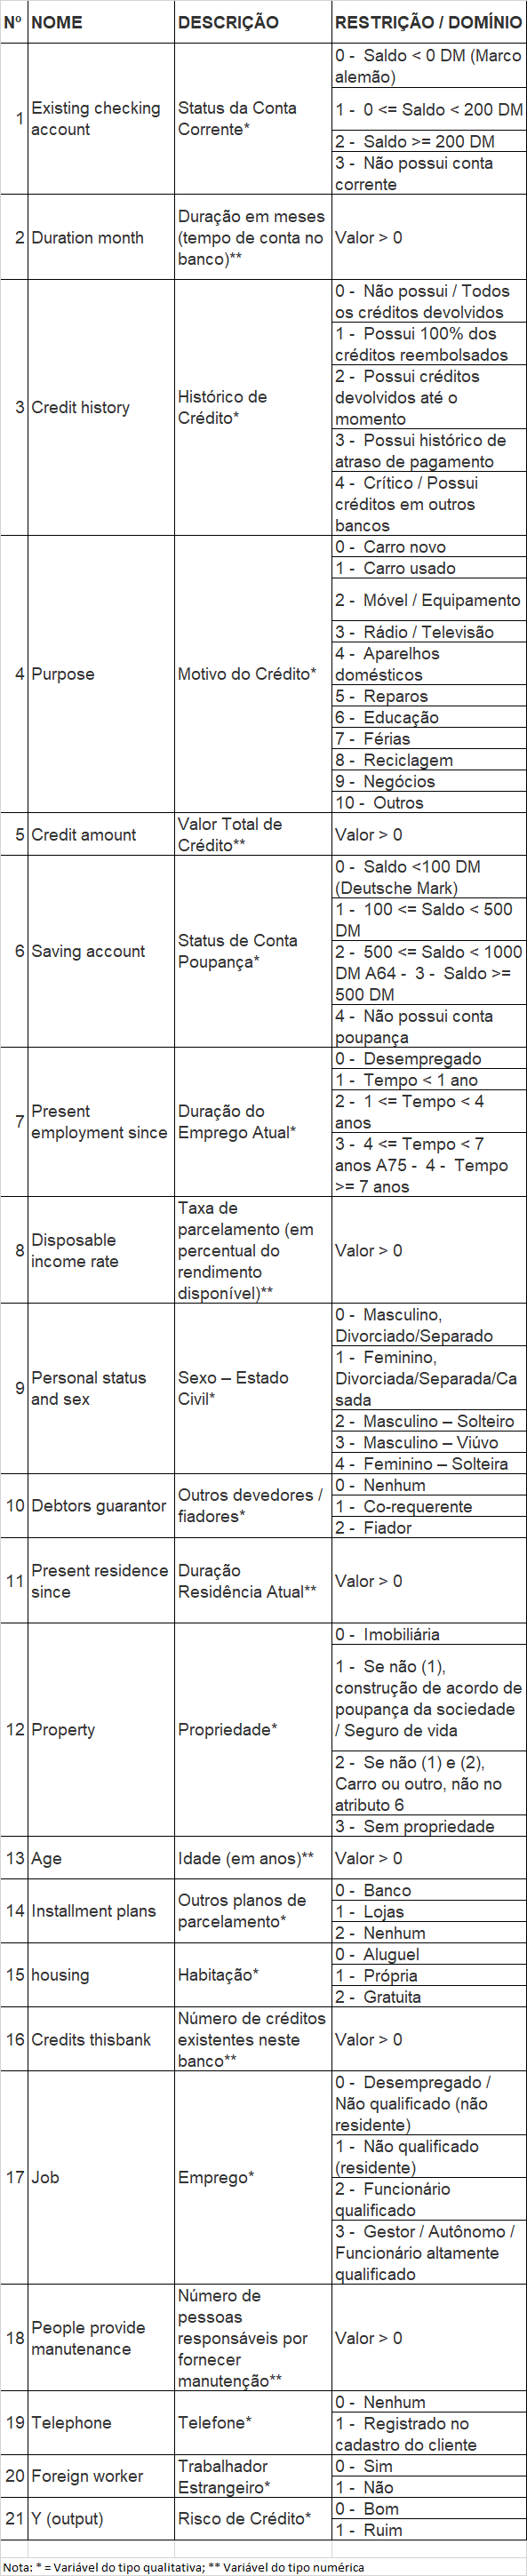



## 2.2 Lendo os dados em Python
O arquivo utilizado para este estudo de caso é "https://datahub.io/machine-learning/credit-g/r/credit-g.csv". O arquivo está em formato csv.

In [ ]:
# Importando pacotes básicos para ler e manipular os dados.
import numpy as np # Biblioteca de matemática
import pandas as pd # Biblioteca para manipulação e estruturação de dados
import seaborn as sns # Biblioteca com muitas opções para construção de gráficos
import matplotlib.pyplot as plt # Biblioteca com muitas opções para construção de gráficos
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)# Ignoorar as mensagens de alterações futuras nos funções.

In [ ]:
# Lendo e importando o conjunto de dados de um endereço na internet
dados = pd.read_csv('https://datahub.io/machine-learning/credit-g/r/credit-g.csv',
                    sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

## 2.3 Limpeza dos dados

In [ ]:
# O conjuto de dados importado possui 1000 linhas e 21 colunas, como pode ser confirmado usando-se o comando "shape".
dados.shape

(1000, 21)

Uma boa exposição do data frame pode ser feita através de uma tabela dinâmica via função "data_table" do colab. Para isso será importada esta funcionalidade:

In [ ]:
from google.colab.data_table import DataTable

Assim, diversas opções ficam disponíveis para exibição dos dados, como por exemplo: ordenar por coluna, aplicar filtros etc.

In [ ]:
DataTable(dados)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [ ]:
# Usando o comando "head" para visualizar as primeiras linhas e colunas dos dados
dados.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [ ]:
# Verificando as últimas linhas dos dados
dados.tail()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad
999,0<=X<200,45,critical/other existing credit,used car,4576,100<=X<500,unemployed,3,male single,none,...,car,27,none,own,1,skilled,1,none,yes,good


### **Checando existência de Valores Faltantes ou "Missing" (NAN)**

Para encontrar a soma dos valores faltantes por variáveis pode-se usar o comando "dados.isnull().sum()".

In [ ]:
# RELAÇÃO DA QUANTIDADE
dados.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

Observa-se que não há valores faltantes e por isso não há a necessidade de procedimentos adicionais.

## **2.4 Análise e tratamento de dados**







### Análise dos tipos de atributos.

In [ ]:
# object: strings
# int64: números inteiros
# float64: números reais
# complex: números complexos
dados.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

**Análises e Estatísticas Descritivas**

Estatísticas descritivas das variáveis numéricas (contínuas e discretas) são obtidas abaixo.

In [ ]:
dados.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### **Análise quantitativa da variável explicada ou alvo**
Observação: a variável "class" foi renomeada para "credit" uma que o primeiro nome poderia ser confundido como o nome de um elemento de alguma função de  pacote aqui utilizado. Para isso utilizou-se o comando "rename".

In [ ]:
dados.rename(columns={'class': 'credit'}, inplace = True)

In [ ]:
dados.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
credit                    object
dtype: object

Contando os valores de clientes que foram adimplentes ("good") e inadiplentes ("bad") no variável alvo.

In [ ]:
dados['credit'].value_counts()

good    700
bad     300
Name: credit, dtype: int64

Conhecendo a distribuição dos tipos de perfis de crédito presentes na amosta.

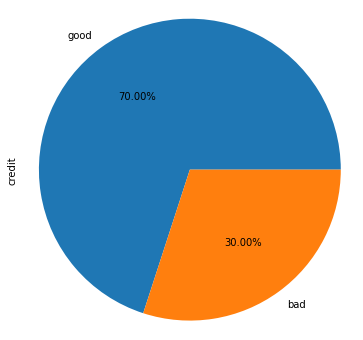

In [ ]:
dados.credit.value_counts().plot(figsize=(6,6),kind='pie', autopct='%.2f%%')
plt.axis('equal');

Assim, verifica-se que há um relativo desequilíbrio na distribuição de cada classe, com uma concentrção de 70% do tipo "good" e 30% de "bad". Este fato não consiste em um problema pois não se trata de uma concentração extrema. Uma distribuição altemente concentrada  em apenas um tipo poderia afetrar a capacidade dos algoritmos de aprendizado de máquina de classificar corretamente um indivíduo que não estivesse contido na amostra.

### **Análise quantitativa das variáveis explicativas (Atributos)**

Diversos gráficos e outras formas de se descrever os dados podem ser usados. Com são 20 variáveis explicativas, optou-se pelo seguinte critério:
*  Análise visual das **variáveis ​​categóricas** por meio de **gráfico de barras**; e
*  Exposição das **variáveis numéricas ​​contínuas ou discretas** por **histogramas** e **boxplot**.



### checking_status (Variável categórica) 

Esta variável diz respeito ao valor do saldo, em marco alemão, disponível na conta do cliente.

In [ ]:
dados['checking_status'].value_counts()

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64

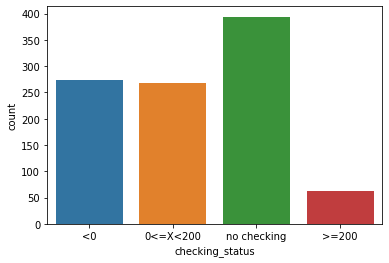

In [ ]:
sns.countplot(dados['checking_status']);

### duratinon (variável numérica discreta)

A variável informa o tempo de conta no banco, medido me meses.   

In [ ]:
dados['duration'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duration, dtype: float64

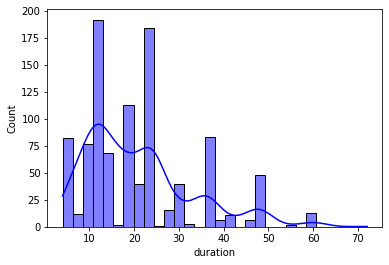

In [ ]:
sns.histplot(dados, x="duration", bins=30, color="blue", kde=True, stat="count");

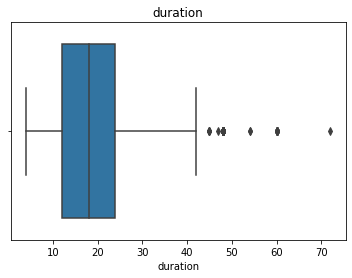

In [ ]:
sns.boxplot(dados["duration"]).set_title("duration");

No boxplot pode-se perceber seis observações discrepantes, que possuem  valores que estão acima de dois desvios padrão. Apesar disso, estas informações são de interesse e importantes para o problema de classificação com base no perfil dos clientes. Assim, não é aconselhável provedimentos que alterem os dados, tais como: substituição dos mesmos por mediana, exclusão destes clentes da base, etc. 

### credit_history (Variável categórica)

De forma resumida, a variável reporta o histórico de crédito de cada cliente, tais como: já pagou ao banco todos os créditos que lhe foram emprestados, possui histórico de atraso no pagamento, possui empréstimo(s) em outro(s) banco(s), etc.

In [ ]:
dados['credit_history'].value_counts()

existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64

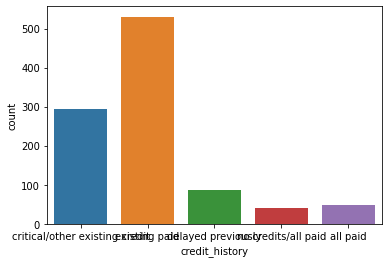

In [ ]:
sns.countplot(dados['credit_history']);# Descobrir com consertar a legenda!!!"""

### purpose (Variável categórica)

Variável que informa qual o motivo que levou o cliente a tomar crédito. Por exemplo: compra de carro novo, compra de carro usado, aquisição de móveis ou equipamento, compra aparelho de som ou televisão, etc.

In [ ]:
dados['purpose'].value_counts()

radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: purpose, dtype: int64

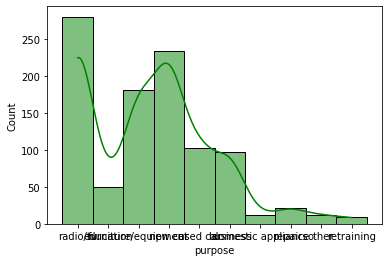

In [ ]:
sns.histplot(dados, x="purpose", bins=30, color="green", kde=True, stat="count");

### credit_amount (variável numérica contínua )

Volume de crédito demandado pelos clientes.
Análise exploratória dos dados "credit_amount" ou montante de crédito:

In [ ]:
dados['credit_amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

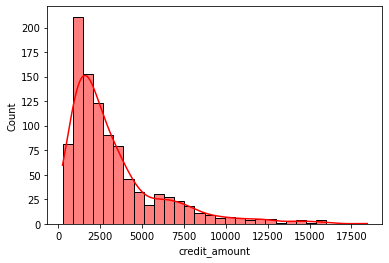

In [ ]:
sns.histplot(dados, x="credit_amount", bins=30, color="red", kde=True, stat="count");

Usando o boxplot para identificar possíveis outliers. Diversos observações estão acima de dois desvio padrão, porém estes valores em conta e não devem ser modificados (exluidos ou substituidos pela média, por exemplo) uma vez que constituem informações corretas dos clientes e são imporantes para que o modelo possa "aprender".

Tratamentos que pode ser feito na variável "credit_amount" é a normalização ou padronização com o objetivo de reduzir a dimenssão ou escala da mesma.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Saldo')

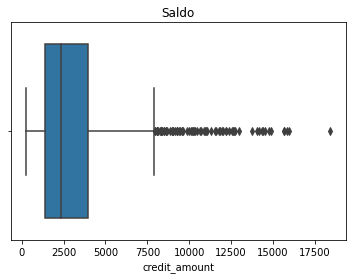

In [ ]:
sns.boxplot(dados['credit_amount']).set_title("Saldo")

### savings_status (Variável categórica)

In [ ]:
dados['savings_status'].value_counts()

<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


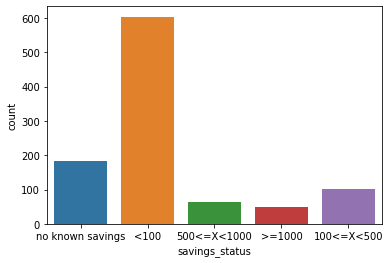

In [ ]:
sns.countplot(dados['savings_status']);

### employment (Variável categórica)

In [ ]:
dados['employment'].value_counts()

1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


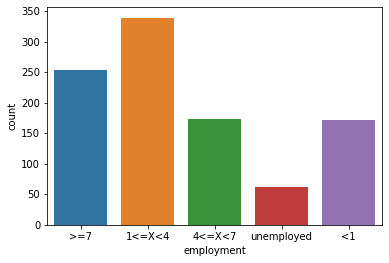

In [ ]:
sns.countplot(dados['employment']);

### installment_commitment (Variável categórica)

In [ ]:
dados['installment_commitment'].value_counts()

4    476
2    231
3    157
1    136
Name: installment_commitment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


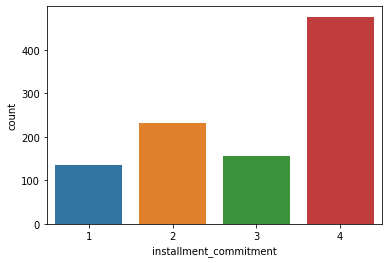

In [ ]:
sns.countplot(dados['installment_commitment']);

### personal_status (Variável categórica)

In [ ]:
dados['personal_status'].value_counts()

male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: personal_status, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


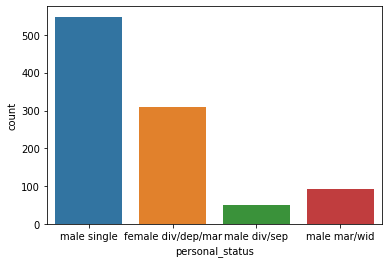

In [ ]:
sns.countplot(dados['personal_status']);

### other_parties (Variável categórica)

In [ ]:
dados['other_parties'].value_counts()

none            907
guarantor        52
co applicant     41
Name: other_parties, dtype: int64

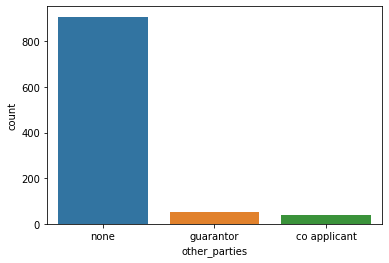

In [ ]:
sns.countplot(dados['other_parties']);

### residence_since (Variável categórica)

In [ ]:
dados['residence_since'].value_counts()

4    413
2    308
3    149
1    130
Name: residence_since, dtype: int64

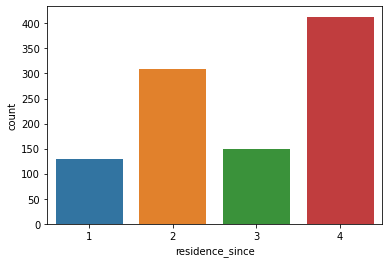

In [ ]:
sns.countplot(dados['residence_since']);

### property_magnitude (Variável categórica)

In [ ]:
dados['property_magnitude'].value_counts()

car                  332
real estate          282
life insurance       232
no known property    154
Name: property_magnitude, dtype: int64

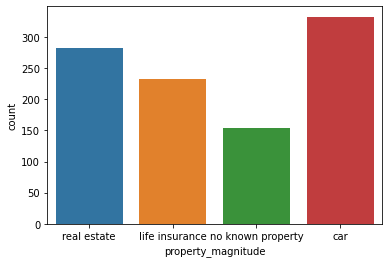

In [ ]:
sns.countplot(dados['property_magnitude']);

### age (Variável numérica discreta)

In [ ]:
dados["age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

Aparentemente não há valores discrepantes na idade, sendo a menor de 19 anos e a maior de 75 anos.

Pode-se observar que a média (36,546) e a mediana (33,00) estão razoavelmente próximos indicando que os dados possuem uma distribuição com alguma semelhança da distribuição normal, o que é desejável. 

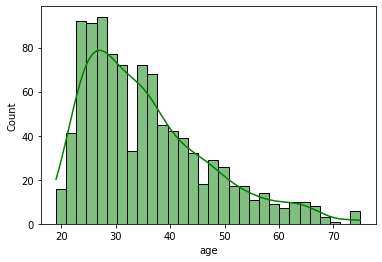

In [ ]:
sns.histplot(dados, x="age", bins=30, color="green", kde=True, stat="count")

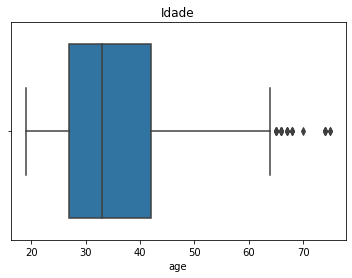

In [ ]:
sns.boxplot(dados["age"]).set_title("Idade");

Apesar de algumas valores estarem fora do padrão, representados pelos sete pontos à direita. O boxplot considera dois desvios padrões  e as sete observações estão situadas fora deste desvio. Porém não são idades discrepantes ou uma anomalia nos dados, podendo indivíduos apresentare idade superiores a 65 anos e, portanto, não ha razão para estas observações passarem por algum tratamento de outliers. 

### other_payment_plans (Variável categórica)

In [ ]:
dados['other_payment_plans'].value_counts()

none      814
bank      139
stores     47
Name: other_payment_plans, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


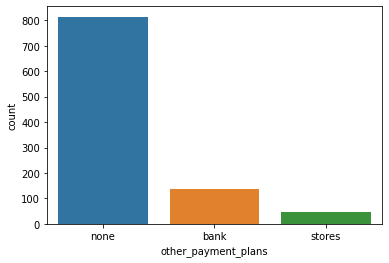

In [ ]:
sns.countplot(dados['other_payment_plans']);

### housing (Variável categórica)

In [ ]:
dados['housing'].value_counts()

own         713
rent        179
for free    108
Name: housing, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


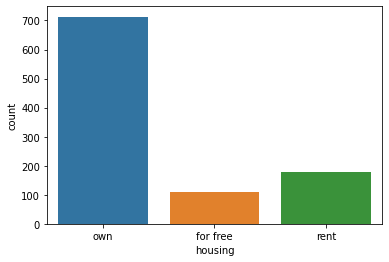

In [ ]:
sns.countplot(dados['housing']);

### existing_credits (Variável categórica)

In [ ]:
dados['existing_credits'].value_counts()

1    633
2    333
3     28
4      6
Name: existing_credits, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


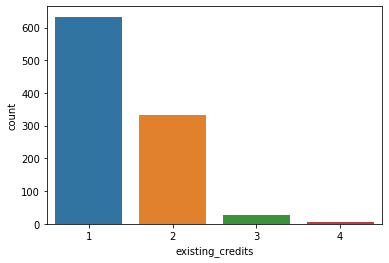

In [ ]:
sns.countplot(dados['existing_credits']);

### job (Variável categórica)

In [ ]:
dados['job'].value_counts()

skilled                      630
unskilled resident           200
high qualif/self emp/mgmt    148
unemp/unskilled non res       22
Name: job, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


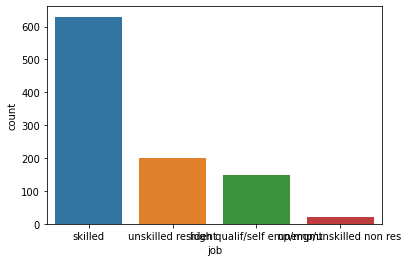

In [ ]:
sns.countplot(dados['job']);

### num_dependents (Variável categórica)

In [ ]:
dados['num_dependents'].value_counts()

1    845
2    155
Name: num_dependents, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


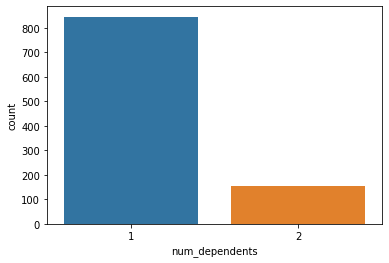

In [ ]:
sns.countplot(dados['num_dependents']);

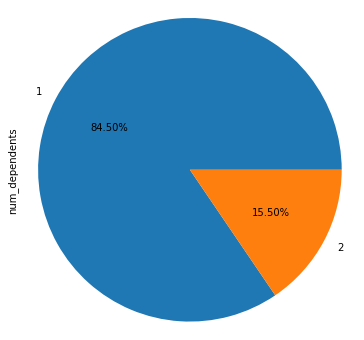

In [ ]:
dados.num_dependents.value_counts().plot(figsize=(6,6),kind='pie', autopct='%.2f%%')
plt.axis('equal');

### own_telephone (Variável categórica)

In [ ]:
dados['own_telephone'].value_counts()

none    596
yes     404
Name: own_telephone, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


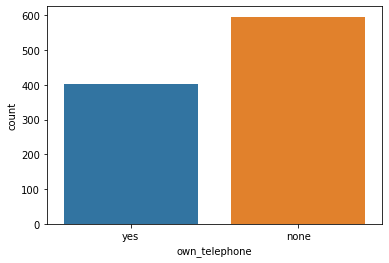

In [ ]:
sns.countplot(dados['own_telephone']);

### foreign_worker (Variável categórica)

In [ ]:
dados['foreign_worker'].value_counts()

yes    963
no      37
Name: foreign_worker, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


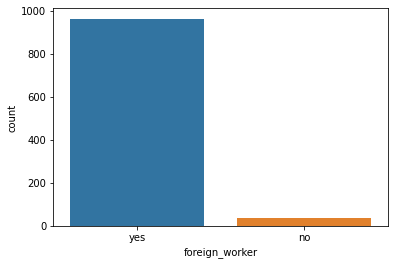

In [ ]:
sns.countplot(dados['foreign_worker']);

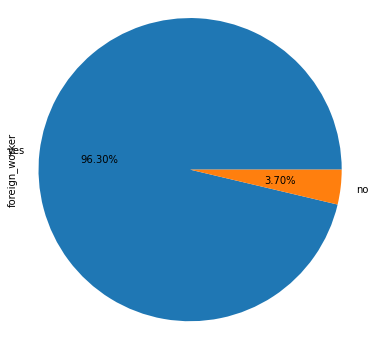

In [ ]:
dados.foreign_worker.value_counts().plot(figsize=(6,6),kind='pie', autopct='%.2f%%')
plt.axis('equal');

## Salvando o dataframe tratado.

In [ ]:
dados.to_csv('dadospreprocessamento', sep=';', encoding='utf-8',index=False)

# **3) Pré processamento dos dados: transformação de variáveis categóricas nominais**

O objetivo aqui é substituir os atributos de cada variável categóricas por numeros. Isso é importante uma vez que vários métodos Machine Learn trabalham "melhor" com  conjutos de dados com atribuitos apenas numérico. 

Esta transformação pode ser feita de três formas:

3.1 - Transformar variáveis categóricas nominais em variáveis numéricas  discretas por meio da função "replace". Esta função permite que você atribua um número a uma "string", ou seja, substitua no data frame o nome da categoria de uma variável por um número. Como exemplo, a variável 'job' assume quatro valores categóricos: 'skilled', 'unskilled resident', 'high qualif/self emp/mgmt' e 'unemp/unskilled non res'. Neste método,  pode-se atribuir, à escolha do pesquisador, qualquer número a cada uma destas categorias, por exemlo: 'skilled'=5, 'unskilled resident'=4, 'high qualif/self emp/mgmt'=7,'unemp/unskilled non res'=6.

3.2 -  Transformar variáveis categóricas nominais em variáveis nunéricas discretas por meio da função "LabelEncoder" do pacote Scikit Learn (ou simplesmente sklearn). Esta funcionalidade faz a mesma tarefa descria em "3.1" porém de forma automática. Aqui  os números são atribuidos automaticamente em ordem crescente, à partir de zero, aos atributos que são ordenados alfabeticamente. Assim a numeração da variável "job" seria, por exemplo:  'high qualif/self emp/mgmt'=0,'skilled'=1, 'unemp/unskilled non res'=3 e 'unskilled resident'=4.

3.3 - Diferentemenete dos dois métodos descritos acima, o OneHotEncoder cria quatro variáveis,  uma para cada atributo. Para a  variável  "job", por exelopl, seriam criadas novas variáveis com apresentado logo abaixo.

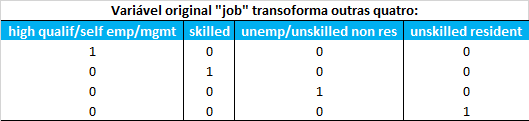

Observação: 
Alguns algorítmos de Machine Learn podem "entender" que, nos métodos descritos em 3.1 e 3.2,  um atribuito que recebeu a numeração 4 tem peso maior que um que recebeu a numeração 3 ou 2, por exemplo. Ou seja, o algoritmo pode assumir que os numeros estabelecem uma ordem de grandeza. Dessa forma, quando se deseja transformar VARIÁVEIS CATEGÓRICAS NOMINAIS EM NUMERICAS sem que os numeros imputados aos atributos representem pesos distintos deve-se utilizar um método semelhante ao OneHotEconder, descrito em 3.3.
**OBSERVAÇÃO IMPORTANTE - ** diante do exposto acima, os métodos 3.1 e 3.2 são apresentados neste projeto apenas para fins ilustrativos e o 3.3 foi implementado para utilização do modelo de classifição adotado.

As categorias presentes na variável "job" podem ser obtidas pelo comando "unique".

In [ ]:
dados["job"].unique()

array(['skilled', 'unskilled resident', 'high qualif/self emp/mgmt',
       'unemp/unskilled non res'], dtype=object)

## 3.1 Transformando variáveis categóricas nominais em numéricas através da função "replace" **(Obs. método não utilizado neste projeto, apresentado apenas para fins ilustrativa)**

A função utilizada para trasformação as variáveis categóricas nominais foi a "replace", com destacado.

o primeiro passo é ler o arquivo como os dados originais do trabalho:

In [ ]:
df=pd.read_csv('/content/dadospreprocessamento',sep=';',encoding="iso-8859-1")

Exibindo as 5 primeiras linhas do dataframe:

In [ ]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


Checando se todas as linhas e colunas foram importadas por meio do comando "shape".

In [ ]:
df.shape

(1000, 21)

Foi feita uma cópia dos dados, chamda aqui de "df2", à partir do dataset original com os tratamentons básicos (df). Isso é interessante porque pode-se realizar tranasformações nos dados contidos em "df2" mantendo-se os dados originais intactos .

In [ ]:
df2 = pd.DataFrame.copy(df)

In [ ]:
df2

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


Antes de se alter alguma variável, pode-se contar os atributos e vificar se a transformação dos mesmos de string's para numeoros foi realizada corretamente. Isso é feito logo abaixo pelo comando "value_counts" para a variável "checking_status".

In [ ]:
df2.checking_status.value_counts()

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64

Alterardo a primeira coluna 'checking_status'. O atributo '<0' será "chamado" de 0. Já o atributo '0<=X<200' será renomeado para 1 e assim por diante.

In [ ]:
df2 ['checking_status'].replace({'<0':0,'0<=X<200':1,'no checking':2,'>=200':3}, inplace=True)

Exibido o dataframe (digitando seu nome na linha de código) percebe-se que a primeira coluna 'checking_status' foi alterada corretamete. 

In [ ]:
df2

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit
0,0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,1,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,2,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,2,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


Contando os atributos da coluna checking_status.

In [ ]:
df2.checking_status.value_counts()

2    394
0    274
1    269
3     63
Name: checking_status, dtype: int64

Abaixo adota-se o mesmo procedimento para as demais variáveis categócias.

In [ ]:
df2 ['credit_history'].replace({'all paid':0,'critical/other existing credit':1,'delayed previously':2, 'existing paid':3, 'no credits/all paid':4}, inplace=True)

In [ ]:
df2 ['purpose'].replace({'all paid':0,'critical/other existing credit':1,'delayed previously':2, 'existing paid':3, 'no credits/all paid':4}, inplace=True)

In [ ]:
df2 ['purpose'].replace({'business':0,'domestic appliance':1,'education':2, 'furniture/equipment':3, 'new car':4,'other':5,'radio/tv':6,'used car':7, 'repairs':8, 'retraining':9}, inplace=True)

In [ ]:
df2 ['savings_status'].replace({'<100':0,'100<=X<500':1,'500<=X<1000':2, '>=1000':3, 'no known savings':4}, inplace=True)

In [ ]:
df2 ['employment'].replace({'<1':0,'1<=X<4':1,'4<=X<7':2, '>=7':3, 'unemployed':4}, inplace=True)

In [ ]:
df2 ['other_parties'].replace({'co applicant':0,'guarantor':1,'none':2}, inplace=True)

In [ ]:
df2 ['personal_status'].replace({'female div/dep/mar':0,'male div/sep':1,'male single':2, 'male mar/wid':3}, inplace=True)

In [ ]:
df2 ['property_magnitude'].replace({'car':0,'life insurance':1,'real estate':2, 'no known property':3}, inplace=True)

In [ ]:
df2 ['other_payment_plans'].replace({'none':0,'bank':1,'stores':2}, inplace=True)

In [ ]:
df2 ['housing'].replace({'own':0,'for free':1,'rent':2}, inplace=True)

In [ ]:
df2 ['job'].replace({'high qualif/self emp/mgmt':0,'skilled':1,'unskilled resident':2, 'unemp/unskilled non res':3}, inplace=True)
df2 ['own_telephone'].replace({'none':0,'yes':1}, inplace=True)
df2 ['foreign_worker'].replace({'no':0,'yes':1}, inplace=True)
df2 ['credit'].replace({'good':0,'bad':1}, inplace=True)

Exibindo o dataframe "df2" com as devidas alterações.

In [ ]:
df2

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit
0,0,6,1,6,1169,4,3,4,2,2,...,2,67,0,0,2,1,1,1,1,0
1,1,48,3,6,5951,0,1,2,0,2,...,2,22,0,0,1,1,1,0,1,1
2,2,12,1,2,2096,0,2,2,2,2,...,2,49,0,0,1,2,2,0,1,0
3,0,42,3,3,7882,0,2,2,2,1,...,1,45,0,1,1,1,2,0,1,0
4,0,24,2,4,4870,0,1,3,2,2,...,3,53,0,1,2,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,12,3,3,1736,0,2,3,0,2,...,2,31,0,0,1,2,1,0,1,0
996,0,30,3,7,3857,0,1,4,1,2,...,1,40,0,0,1,0,1,1,1,0
997,2,12,3,6,804,0,3,4,2,2,...,0,38,0,0,1,1,1,0,1,0
998,0,45,3,6,1845,0,1,4,2,2,...,3,23,0,1,1,1,1,1,1,1


Pode-se observar do dataframe acima que todos atributos "nominais" foram transformados para números. Todas as variáveis foram identificadas como do tipo inteiro (int64), como pode ser visto com a saída do comando abaixo.

In [ ]:
df2.dtypes

checking_status           int64
duration                  int64
credit_history            int64
purpose                   int64
credit_amount             int64
savings_status            int64
employment                int64
installment_commitment    int64
personal_status           int64
other_parties             int64
residence_since           int64
property_magnitude        int64
age                       int64
other_payment_plans       int64
housing                   int64
existing_credits          int64
job                       int64
num_dependents            int64
own_telephone             int64
foreign_worker            int64
credit                    int64
dtype: object

Salvando df2 no formato csv.

In [ ]:
df2.to_csv('dados_tratados2.csv', encoding='iso-8859-1', index = False)

In [ ]:
df2.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit
0,0,6,1,6,1169,4,3,4,2,2,...,2,67,0,0,2,1,1,1,1,0
1,1,48,3,6,5951,0,1,2,0,2,...,2,22,0,0,1,1,1,0,1,1
2,2,12,1,2,2096,0,2,2,2,2,...,2,49,0,0,1,2,2,0,1,0
3,0,42,3,3,7882,0,2,2,2,1,...,1,45,0,1,1,1,2,0,1,0
4,0,24,2,4,4870,0,1,3,2,2,...,3,53,0,1,2,1,2,0,1,1


### 3.1.1 Atributos previsores e alvo

Faz-se necessario separar as variávies em que o algorítmo de Machine Learn irá utilizar para treinar ou seja os chamados previsores.
Estas são as 20 primeiras variáveis ou colunas do data frame. 

Os previsores à partir dos dados aqui tradados serão chamados de "previsores2". 

In [ ]:
previsores2 = df2.iloc[:,0:20].values
previsores2

array([[ 0,  6,  1, ...,  1,  1,  1],
       [ 1, 48,  3, ...,  1,  0,  1],
       [ 2, 12,  1, ...,  2,  0,  1],
       ...,
       [ 2, 12,  3, ...,  1,  0,  1],
       [ 0, 45,  3, ...,  1,  1,  1],
       [ 1, 45,  1, ...,  1,  0,  1]])

A alvo é a última do data frame de nome "class" e remoneada aqui para "alvo2".

In [ ]:
alvo2 = df2.iloc[:,20].values
alvo2

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

## 3.2 Transformando variáveis categóricas nominais em numéricas pelo Sklearn: ferramenta LabelEncoder (Obs. método não utilizado neste projeto, apresentado apenas para fins ilustrativa)

Codificação de variáveis categóricas em numéricas com a ferramenta LabelEncoder.

Importando a funcionalidade "preprocessing" do pacote "sklearn".

In [ ]:
from sklearn.preprocessing import LabelEncoder

Fazendo uma cópia do data frame para transformação. Está cópia será chamada de "df3" e os previsores e alvo à partir desta cópia serão chamados de "previsores3" e "alvo3", respectivamente.

In [ ]:
df3 = pd.DataFrame.copy(df)

In [ ]:
df3.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


### 3.2.1 Atributos previsores e alvo

In [ ]:
previsores3 = df3.iloc[:,0:20].values

In [ ]:
previsores3[:,0] = LabelEncoder().fit_transform(previsores3[:,0])

In [ ]:
previsores3[:,2] = LabelEncoder().fit_transform(previsores3[:,2])
previsores3[:,3] = LabelEncoder().fit_transform(previsores3[:,3])
previsores3[:,5] = LabelEncoder().fit_transform(previsores3[:,5])
previsores3[:,6] = LabelEncoder().fit_transform(previsores3[:,6])
previsores3[:,8] = LabelEncoder().fit_transform(previsores3[:,8])
previsores3[:,9] = LabelEncoder().fit_transform(previsores3[:,9])
previsores3[:,11] = LabelEncoder().fit_transform(previsores3[:,11])
previsores3[:,13] = LabelEncoder().fit_transform(previsores3[:,13])
previsores3[:,14] = LabelEncoder().fit_transform(previsores3[:,14])
previsores3[:,16] = LabelEncoder().fit_transform(previsores3[:,16])
previsores3[:,18] = LabelEncoder().fit_transform(previsores3[:,18])
previsores3[:,19] = LabelEncoder().fit_transform(previsores3[:,19])

df3 = banco de dados original (df) com variáveis transformadas usando LabelEncoder

In [ ]:
previsores3

array([[1, 6, 1, ..., 1, 1, 1],
       [0, 48, 3, ..., 1, 0, 1],
       [3, 12, 1, ..., 2, 0, 1],
       ...,
       [3, 12, 3, ..., 1, 0, 1],
       [1, 45, 3, ..., 1, 1, 1],
       [0, 45, 1, ..., 1, 0, 1]], dtype=object)

In [ ]:
previsores3.shape

(1000, 20)

In [ ]:
alvo3=df3.iloc[:,20].values

In [ ]:
alvo3

array(['good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'go

In [ ]:
alvo3[:,] = LabelEncoder().fit_transform(alvo3[:,])

In [ ]:
alvo3

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
alvo3.shape

(1000,)

## ***3.3 Transformando variáveis categóricas nominais em numéricas pelo Sklearn: ferramenta OneHotEncoder (Obs. método utilizado neste projeto)***

Foi feito uso de uma cópia do banco de dados original, chamada de "df". As variáveis explicativas e a explicada serão chadadas, respectivamente, de "previsores" e "alvo"

A funcionalidade OneHotEncoder irá transformar cada categoria em uma variável em uma variável dummy. Por exemplo, vamos verificar que categorias compoem a variável "cheking_status" através da função "unique".

In [ ]:
df["checking_status"].unique()

array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

Quatro atributos aparecem dentro de "checking_status": o primeiro é '<0', segundo é '0<=X<200', o tercéiro 'no checking', e por fim '>=200'. O OneHotEncoder irá criar uma dummy para cada um dos quatro atributos. Uma ilustração deste processo é apresentada na figura abaixo

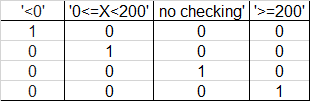


### 3.3.1 Atributos previsores e alvo

Atribuindo a "previsores" as primeiras 20 colunas do data frame.

In [ ]:
previsores = df.iloc[:,0:20].values

Atribuindo a "alvo" a ultima coluna do data frame.

In [ ]:
alvo = df.iloc[:,20].values

Importando as funcionalidades OneHotEncoder e ColumnTransformer da biblioteca scikit-learn (sklearn).

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Resumo dos parâmetros da funcionalidade ColumnTransformer:
- name: nome dado a transformação.
- transformer: tipo de estimador (OneHotEncoder).
- columns: colunas que serão transformadas.
- remainder: o que acontecerá com o restante das colunas não relacionadas: 
1) drop = exclui as outras colunas.
2) passthrough = mantém as outras colunas. drop é default. LOGO, SE O DEFAULT FOR MANTIDO TODAS AS COLUNAS NÃO INCLUÍDAS NA TRANSFORMAÇÃO SERÃO EXCLUÍDAS.
- sparse_threshold: parâmetro de classificação de matrizes esparsas. default é 0.3
- n_jobs: número de trabalhos a serem executados em paralelo. default é nenhum
- transformer_weights: definição de pesos aos transformadores.
-verbose: default é False. se for True a execução é apresentada na tela.

As variáveis que precisam de transformação são 0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19. Obs.: em Python a primeira coluna e nos numerada com zero.

In [ ]:
transformacao_previsores = ColumnTransformer(transformers=[('transformacao', OneHotEncoder(), [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19])],
                                remainder='passthrough')

In [ ]:
previsores = transformacao_previsores.fit_transform(previsores)

In [ ]:
previsores

array([[0.0, 1.0, 0.0, ..., 67, 2, 1],
       [1.0, 0.0, 0.0, ..., 22, 1, 1],
       [0.0, 0.0, 0.0, ..., 49, 1, 2],
       ...,
       [0.0, 0.0, 0.0, ..., 38, 1, 1],
       [0.0, 1.0, 0.0, ..., 23, 1, 1],
       [1.0, 0.0, 0.0, ..., 27, 1, 1]], dtype=object)

In [ ]:
previsores.shape

(1000, 61)

In [ ]:
alvo

array(['good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'go

In [ ]:
transformacao_alvo = LabelEncoder()

In [ ]:
alvo = transformacao_alvo.fit_transform(alvo)

In [ ]:
alvo

## **3.4 RESUMO PRÉ-PROCESSAMENTO**



3.1 Procedimento de transformação das variáveis, **não usado neste projeto, apenas ilustrativo**:
*   df2  =  cópia do data frame original (dados);
*   previsores2 = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, via função "replace"; e,
*   alvo2 = variável que se pretende atingir (crédito "bom" ou crédito "ruim").


3.2 Procedimento de transformação das variáveis, **não usado neste projeto, apenas ilustrativo**:
*   df3  =  cópia do data frame original (dados);
*   previsores3 = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo labelencoder; e,
*   alvo3 = variável que se pretende atingir (crédito "bom" ou crédito "ruim").

3.3 Procedimento de transformação das variáveis, **utilizado  neste projeto**:
*   df  =  cópia do data frame original (dados);
*   previsores = conjunto de variáveis previsoras transformadas pelo labelencoder  e onehotencoder; e,
*   alvo = variável que se pretende atingir (crédito "bom" ou crédito "ruim").


# **4 Modelos de classificação: Algoritmo com base de treinamento e teste no Scikit-Learn (ATTSL)**

In [ ]:
from sklearn.model_selection import train_test_split

Parâmetros train_test_split:   
- arrays: nomes dos atributos previsores e alvo.   
- test_size: tamanho em porcentagem dos dados de teste. default é none.   
- train_size: tamanho em porcentagem dos dados de treinamento.default é none.  
- random_state: nomeação de um estado aleatório.   
- shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.  
stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção.

In [ ]:
previsores_treinamento, previsores_teste, alvo_treinamento, alvo_teste = train_test_split(previsores, alvo, test_size=0.15, random_state=0)


In [ ]:
previsores_treinamento.shape

(850, 61)

In [ ]:
previsores_teste.shape

(150, 61)

In [ ]:
alvo_treinamento.shape

(850,)

In [ ]:
alvo_teste.shape

(150,)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#MLPClassifier?

Parâmetros MLPClassifier   
- hidden_layer_sizes (camadas escondidas): default (100,)   

  Quant.= (Ne+Ns)/2 = (61+1)/2 = 33 neurônios   
  Quant.=2/3.(Ne) + Ns = 2/3.61+1 =~ 42 neurônios
- activation: Função de ativação default='relu' 
- solver: algoritmo matemático. Default='adam' (datasets grandes = acima de 1000 amostras). lbfgs é para datasets pequenos. sgd é com a descida do gradiente estocástico (recomendado testar).
- alpha:  parâmetro para o termo de regularização de ajuste de pesos. Aumento de alpha estimula pesos menores e diminuição de alpha estimula pesos maiores. Default=0.0001.
- batch_size: tamanho dos mini lotes. default=min(200, n_samples). Não usar com o solver lbfgs.
- learning_rate: taxa de aprendizagem. default='constant'. Três tipos:   
  1- 'constant':uma taxa de aprendizado constante dada pela taxa de aprendizagem inicial.   
  2- 'invscaling': diminui gradualmente por: taxa efetiva = taxa inicial / t^power_t  
  3- 'adaptive': a taxa é dividida por 5 cada vez que em duas épocas consecutivas não diminuir o erro.
- learning_rate_init: taxa de aprendizagem inicial. Default=0.001
- power_t: default=0.5. usado apenas para solver 'sgd'.
- max_iter int: Número máximo de iterações. default = 200.  ('sgd', 'adam').
- max_fun: Número máximo de chamadas de função de perda. Para 'lbfgs'. Default: 15000
- shuffle: default = True
Usado apenas quando solver = 'sgd' ou 'adam'.
- random_state: default = None
- tol:Tolerância para a otimização.Default=0.0001
- momentum: otimização do algoritmo 'sgd'. Default: 0.9.
- n_iter_no_change: Número máximo de épocas que não atinge a tolerância de melhoria. default = 10. Apenas para solver = 'sgd' ou 'adam'
- verbose : Mostra o progresso. default=False.



In [ ]:
classificador = MLPClassifier(hidden_layer_sizes=(33,33), activation='relu', solver='lbfgs', max_iter=500,
                              tol=0.0001, random_state = 12, verbose = True)
                               

In [ ]:
classificador.fit(previsores_treinamento, alvo_treinamento)

MLPClassifier(hidden_layer_sizes=(33, 33), max_iter=500, random_state=12,
              solver='lbfgs', verbose=True)

In [ ]:
previsoes = classificador.predict(previsores_teste)

In [ ]:
previsoes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
print(classificador.out_activation_)

logistic


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
acuracia = accuracy_score(alvo_teste, previsoes)

In [ ]:
acuracia

0.7733333333333333

In [ ]:
matriz = confusion_matrix(alvo_teste, previsoes)

In [ ]:
matriz

array([[  9,  30],
       [  4, 107]])

# **5 Algoritmo com validação cruzada no Scikit-Learn**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

Parâmetros StratifiedkFold:   
- n_splits (k): número de divisões (folds). recomendado=10. Default = 5.

In [ ]:
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 3)

In [ ]:
exemplo = np.zeros(shape=(previsores.shape[0], 1)) #exemplo para criar índices para fazer a separação treinamento e teste
exemplo

In [ ]:
exemplo.shape

(1000, 1)

In [ ]:
resultados = []
matrizes = []
for indice_treinamento, indice_teste in kfold.split(previsores,
                                                    np.zeros(shape=(previsores.shape[0], 1))): # cria índices para todos os registros (linhas) para fazer a separação;
    classificador = MLPClassifier(hidden_layer_sizes=(53,), max_iter=500, tol=0.001, random_state = 12, verbose = True)
    classificador.fit(previsores[indice_treinamento], alvo[indice_treinamento]) 
    previsoes = classificador.predict(previsores[indice_teste])
    acuracia = accuracy_score(alvo[indice_teste], previsoes)
    matrizes.append(confusion_matrix(alvo[indice_teste], previsoes))
    resultados.append(acuracia)

In [ ]:
resultados = np.asarray(resultados)
resultados.mean() #média

0.6899999999999998

In [ ]:
resultados.std() #desvio padrão

0.047749345545253286

In [ ]:
matriz_final = np.mean(matrizes, axis = 0)

In [ ]:
matriz_final

array([[ 7.9, 22.1],
       [ 8.9, 61.1]])